# shAI Training 2022 | Level 1


## Task#9 (MNIST Project part 2)

### Classification

- Before you start make sure you have latest Jupyter notebook version 
- <font color= red> If you have older version fetching the data might be different  </font>  


In [1]:
import sklearn.datasets
from sklearn.datasets import fetch_openml
mnist =fetch_openml('mnist_784')
x, y = mnist["data"], mnist["target"]

c:\Users\Yassin52\myenv\lib\site-packages\sklearn\datasets\_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


#### peek at one digit

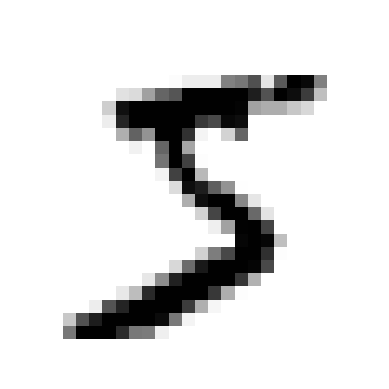

In [6]:
import matplotlib.pyplot as plt

x = x.to_numpy()
y = y.to_numpy()

some_digit = x[0]  
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()


In [7]:
import numpy as np 
x_train, x_test, y_train, y_test = x[:60000], x[60000:], y[:60000], y[60000:]
shuffle_index = np.random.permutation(60000)
x_train, y_train = x_train[shuffle_index], y_train[shuffle_index]

In [8]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)

#### Try SGDCClassifier with multiple calss

In [10]:

from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler


shuffle_index = np.random.permutation(60000)
x_train, y_train = x_train[shuffle_index], y_train[shuffle_index]

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)


sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(x_train_scaled, y_train)

x_test_scaled = scaler.transform(x_test)
y_pred = sgd_clf.predict(x_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8992


#### Call decision_function() method to return score for each instance 

In [11]:
# CODE HERE
decision_scores = sgd_clf.decision_function(x_test_scaled)
print("Decision Scores:", decision_scores)

Decision Scores: [[-9.80774603e+02 -1.36751766e+03 -1.05366216e+03 ...  2.14884589e+02
  -3.41872932e+02 -1.66675407e+02]
 [-5.89763055e+02 -4.76138446e+02  1.11751124e+02 ... -3.13231958e+03
  -8.34403935e+02 -2.52292396e+03]
 [-1.45299574e+03  9.11083902e+01 -1.15190706e+02 ... -3.58293848e+02
  -3.02279753e+01 -3.68626589e+02]
 ...
 [-1.87260295e+03 -1.22999381e+03 -9.42792602e+02 ... -2.69949585e+02
  -9.68178538e+00 -7.12452646e+01]
 [-1.32189905e+03 -6.68404858e+02 -1.01136089e+03 ... -1.11735023e+03
   1.23721054e+00 -9.04169026e+02]
 [-7.67915423e+02 -2.79962700e+03 -5.11237549e+02 ... -2.55012167e+03
  -8.19186085e+02 -2.39065873e+03]]


#### find highest score 

In [12]:
# CODE HERE
highest_score = np.max(decision_scores)
print("Highest Score:", highest_score)

Highest Score: 1293.4019823297515


#### list the target classes

In [13]:
# CODE HERE
target_classes = np.unique(y)
print("Target Classes:", target_classes)

Target Classes: ['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']


#### Find the the target class for 7

In [15]:
# CODE HERE
# if you got stuck use GOOGLE
target_class_7 = target_classes[int(y[0])]
print("Target Class for '7':", target_class_7)

Target Class for '7': 5


#### Force ScikitLearn to use one-versus-one

In [16]:
from sklearn.multiclass import OneVsOneClassifier

In [17]:
# CODE HERE
sgd_clf = OneVsOneClassifier(SGDClassifier(random_state=42))

sgd_clf.fit(x_train_scaled, y_train)

x_test_scaled = scaler.transform(x_test)
y_pred = sgd_clf.predict(x_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9272


#### find how many classifier OvO used

In [18]:
# CODE HERE
num_classifiers = len(sgd_clf.estimators_)
print("Number of Classifiers:", num_classifiers)

Number of Classifiers: 45


#### Train  RandomForestClassifier 

In [19]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)

In [20]:
# CODE HERE

forest_clf = RandomForestClassifier(random_state=42)

forest_clf.fit(x_train_scaled, y_train)

x_test_scaled = scaler.transform(x_test)
y_pred = forest_clf.predict(x_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9703


#### call predict_proba() to get the list of probabilities that the classifier assigned to each instance for each class

In [22]:
forest_clf.predict_proba([some_digit])

array([[0.12, 0.  , 0.08, 0.22, 0.04, 0.09, 0.09, 0.01, 0.33, 0.02]])

#### Find accurcy using cross validation score ()

In [23]:
from sklearn.model_selection import cross_val_score

In [25]:
# CODE HERE
accuracy_scores = cross_val_score(forest_clf, x_train_scaled, y_train, cv=5)

print("Accuracy Scores:", accuracy_scores)
print("Mean Accuracy:", np.mean(accuracy_scores))

Accuracy Scores: [0.96483333 0.96583333 0.97083333 0.96933333 0.96741667]
Mean Accuracy: 0.9676500000000001


#### to get better accurcy try scaling input

In [ ]:
from sklearn.preprocessing import StandardScaler

Accuracy Scores: [0.96483333 0.96583333 0.97083333 0.96933333 0.96741667]
Mean Accuracy: 0.9676500000000001


## Error Analysis

#### Take a look at the confusion matrix

In [26]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

In [27]:
# CODE HERE

y_train_pred = cross_val_predict(forest_clf, x_train_scaled, y_train, cv=5)

confusion_mat = confusion_matrix(y_train, y_train_pred)
print("Confusion Matrix:")
print(confusion_mat)


Confusion Matrix:
[[5850    1    9    3    3    6   18    0   29    4]
 [   1 6638   40   16   11    3    5   14    9    5]
 [  23   12 5775   18   25    4   23   36   33    9]
 [   6    6   84 5827    4   65    8   46   52   33]
 [  10    7    7    2 5670    1   27   12   13   93]
 [  24    5    7   63    8 5204   45    7   37   21]
 [  30   11    3    0   10   37 5812    0   15    0]
 [   5   23   55    6   33    0    0 6060   13   70]
 [  10   34   30   44   29   37   28    6 5571   62]
 [  21    9   14   74   62   22    3   53   39 5652]]


#### using Matplotlib’s matshow() function look at an image representation of the confusion matrix

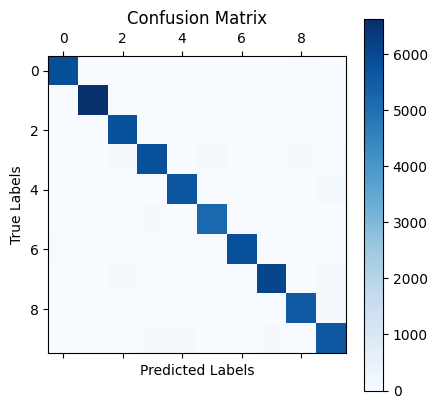

In [28]:
# CODE HERE
plt.matshow(confusion_mat, cmap=plt.cm.Blues)
plt.colorbar()
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

#### Dividing each value in the confusion matrix by the number of images in the corresponding class

In [30]:
row_sums = confusion_mat.sum(axis=1, keepdims=True)
norm_conf_mx = confusion_mat / row_sums

#### fill the diagonal with zeros to keep only the errors

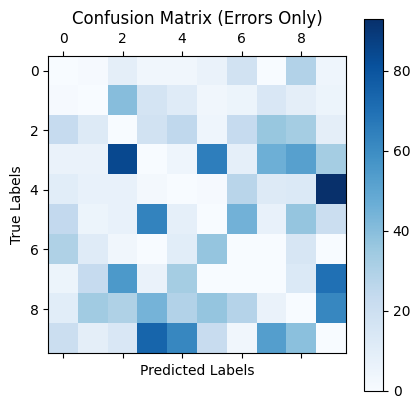

In [31]:
# CODE HERE
np.fill_diagonal(confusion_mat, 0)

plt.matshow(confusion_mat, cmap=plt.cm.Blues)
plt.colorbar()
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Errors Only)')
plt.show()

In [32]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

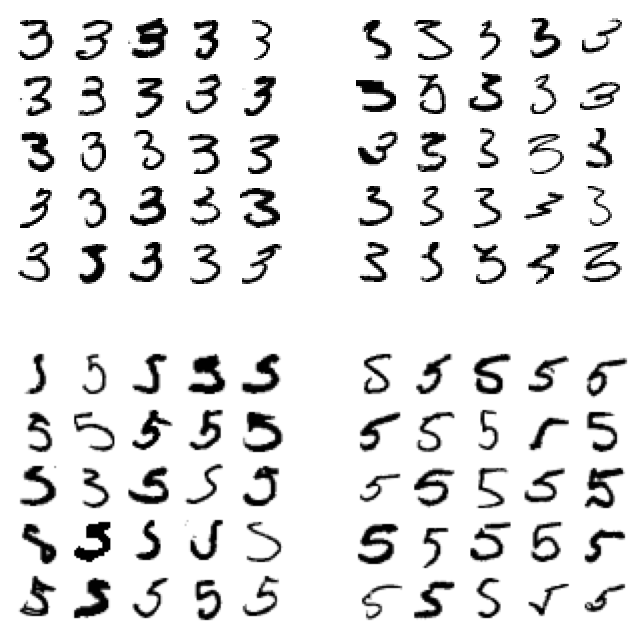

In [33]:
cl_a, cl_b = '3', '5'
X_aa = x_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = x_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = x_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = x_train[(y_train == cl_b) & (y_train_pred == cl_b)]
plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
plt.show()


## Multilabel Classification

#### creates a y_multilabel array containing two target labels for each digit image

In [34]:
from sklearn.neighbors import KNeighborsClassifier
y_train_large = (y_train >= '7')
y_train_odd = (y_train == '1')
y_multilabel = np.c_[y_train_large, y_train_odd]
knn_clf = KNeighborsClassifier()
knn_clf.fit(x_train, y_multilabel)

KNeighborsClassifier()

#### find the prediction

In [35]:
# CODE HERE

y_pred = knn_clf.predict(x_test)


#### computes the average F1 score across all labels
***Warning: the following cell may take a very long time (possibly hours depending on your hardware)***

In [ ]:
#y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_train, cv=3)
#f1_score(y_train, y_train_knn_pred, average="macro")

## Multioutput Classification


In [36]:
noise = np.random.randint(0, 100, (len(x_train), 784))
X_train_mod = x_train + noise
noise = np.random.randint(0, 100, (len(x_test), 784))
X_test_mod = x_test + noise
y_train_mod = x_train
y_test_mod = x_test

#### Let’s take a peek at an image from the test set

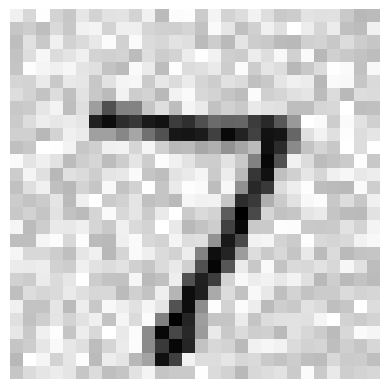

In [37]:
# CODE HERE
some_index = 0  
some_digit = X_test_mod[some_index]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()

# Congrats you've finished your first classification Project🥳 !
# #shAI_Club